In [1]:
# Standard imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_script_directory():
    try:
        # This will work if the script is run directly
        script_path = os.path.abspath(__file__)
    except NameError:
        # This will work in an interactive environment like Jupyter
        script_path = os.path.abspath('')
    
    return script_path

In [3]:
sys.path.append(r"C:\Geotech_Research\CriticalSoilModels\pumat")

from lib.Load_Classes.Popular_Load_Class import PopularPath
from lib.Driver_Classes.Mod_Driver_Setup import DriverModelSetup
from lib.Driver_Classes.Mod_Driver_Model import DriverModel
from lib.general_functions.executing_runs import generate_batch_script, run_batch_script

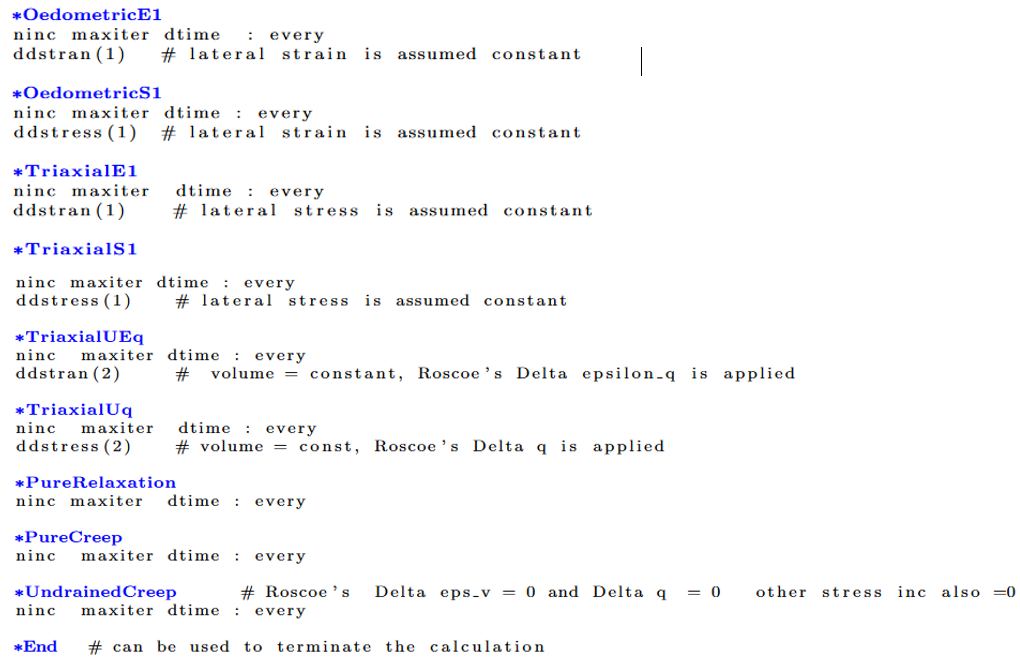

In [4]:
test_name = "TriaxialE1"
load_params = {
    "ninc": 1000,
    "maxiter": 1,
    "dtime"  : 500_000,
    "every"  : 1,
    "ddstran_1": -0.1,
}

load = PopularPath(test_name, load_params)

In [5]:
-0.

-0.0

In [6]:
# This needs to be in the order that the parameters should be in
properties = {
    # "Shear modulus" : 2500,
    # "poisson ratio" : 0.2,
    # Input the other properties here

}

In [7]:
folder = get_script_directory()
exe_name = r"assoc_MC_inc_driver.exe"

exe_path = os.path.join(folder, exe_name)

setup =DriverModelSetup(folder, "MC", "output.txt")

In [8]:
setup.store_loads(load)

In [9]:
print(setup)

Constitutive model name: MC
Folder path: c:\Geotech_Research\CriticalSoilModels\pumat\1_MC_Linear


In [10]:
setup.write_parameters_file(properties)
stress = [-100, -100, -100, 0, 0, 0]

# Make a dict of all the state parameters
# NOTE: There is no assumption that there are more state parameters than those entered here.
# If the state parameter should be zero at the start then it should entered here with a value of zero
state_params = {
    # "cohesion": 0,
    # "phi"     : 25.4 
}

setup.write_initial_conditions_file(stress, state_params)
setup.write_loads()

In [14]:
generate_batch_script(folder, exe_path)
batch_file_path = os.path.join(folder, "run_model.bat")
run_batch_script(batch_file_path)

Batch file 'c:\Geotech_Research\CriticalSoilModels\pumat\1_MC_Linear\run_model.bat' executed successfully.


In [15]:
model= DriverModel(folder, "MC", exe_path, "output.txt")

In [16]:
print(model.results)

Output file name: output.txt
Results folder path: c:\Geotech_Research\CriticalSoilModels\pumat\1_MC_Linear



In [17]:
model.results.store_all()

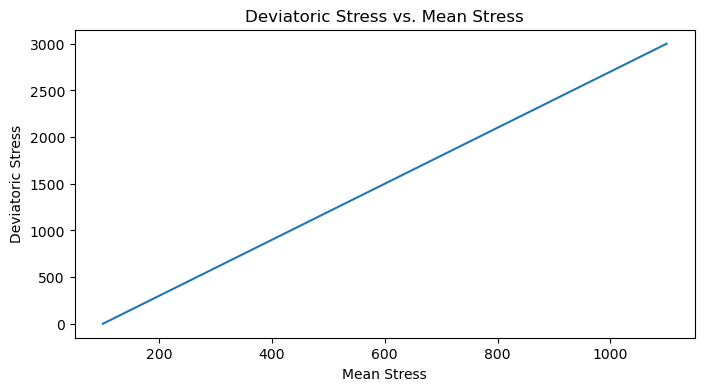

In [18]:
model.results.quick_plot_stress()

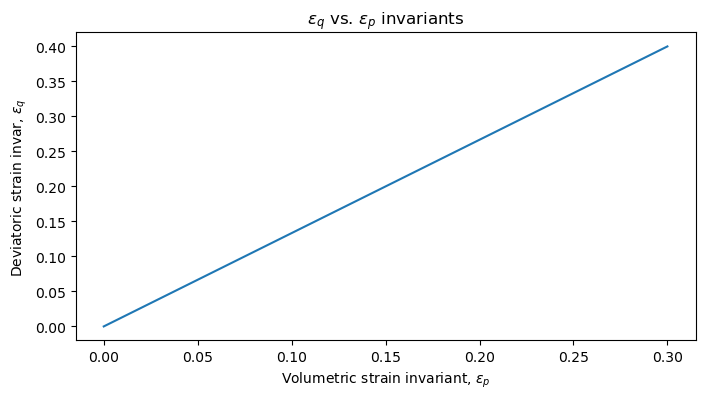

In [19]:
model.results.quick_plot_strain()

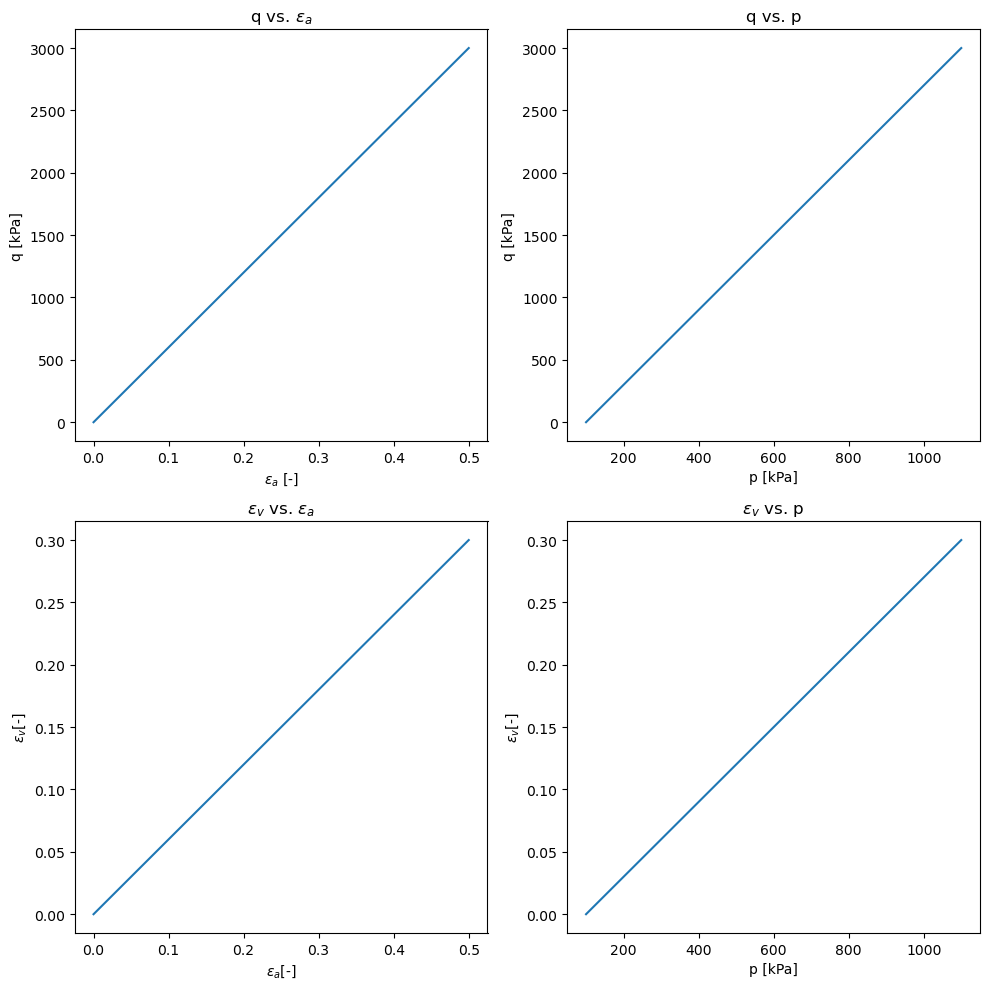

In [20]:
model.results.quick_quad_plot(compression_pos=True)

In [21]:
q = model.results.get_q_invariant()
p = model.results.get_mean_stress()

(-10.0, 160.0)

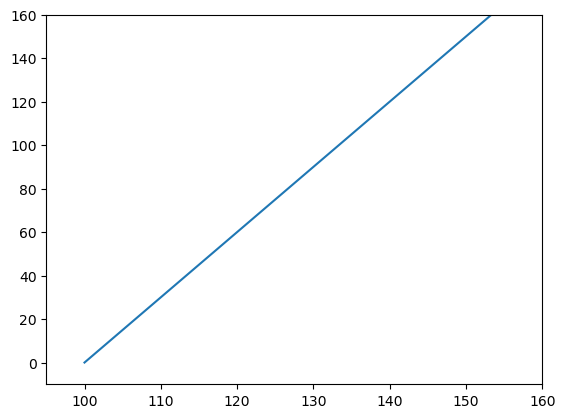

In [22]:
plt.plot(-1.0 * p, q)
plt.xlim([95, 160])
plt.ylim([-10, 160])